<BarContainer object of 9 artists>

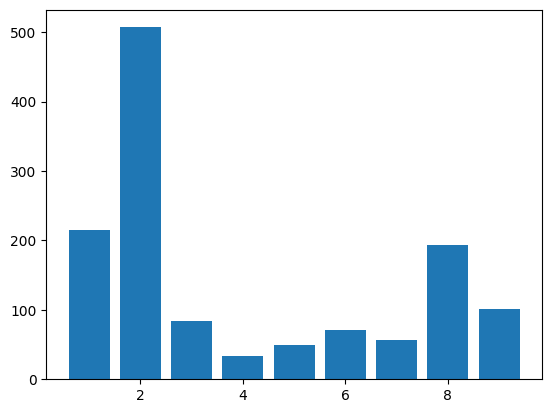

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import geojson
from shapely.geometry import shape, Point

license_data = pd.read_csv("liq license data.csv")
coords = pd.read_excel("liquor_licenses_converted.xlsx")
license_data['long'] = coords['to Longitude']
license_data['lat'] = coords['to Latitude']

with open("City_Council_Districts_View.geojson") as f:
    gj = geojson.load(f)

district4 = shape(gj['features'][6]['geometry'])
df4 = license_data[license_data.apply(lambda x: Point(x.long,x.lat).within(district4), axis=1)] # district 4 only
district_names = []
total_num_licenses = []
for i in range(len(gj['features'])):
    district = gj['features'][i]['properties']['DISTRICT']
    district_names.append(district)
    boundaries = shape(gj['features'][i]['geometry'])
    num_licenses = len(license_data[license_data.apply(lambda x: Point(x.long,x.lat).within(boundaries), axis=1)])
    total_num_licenses.append(num_licenses)
    
# print(district_names, total_num_licenses)
plt.bar(x=district_names,height=total_num_licenses)  


District 4 clearly has the fewest liquor licenses with 34. The District with the next fewest liquor licenses is District 5 with 50. 